In [2]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# CL1

# HIBP

In [3]:
with open('results/split_mnist_cifar10_norm.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()
# alpha0=20, alpha=4

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [5]:
with open('results/split_mnist_cifar10_ibp_norm.pkl', 'rb') as input_file:
    d_ibp = pickle.load(input_file)
d_ibp.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [4]:
d['vcl_baselines'].keys()

dict_keys([20, 100, 400])

In [15]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc = d_ibp['vcl_ibp']
vcl_result_h20 = d['vcl_baselines'][20]
vcl_result_h100 = d['vcl_baselines'][100]
vcl_result_h400 = d['vcl_baselines'][400]
_hibp_acc = np.mean(hibp_acc, 0)
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h20 = np.mean(vcl_result_h20, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h20 = np.nanmean(vcl_result_h20, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

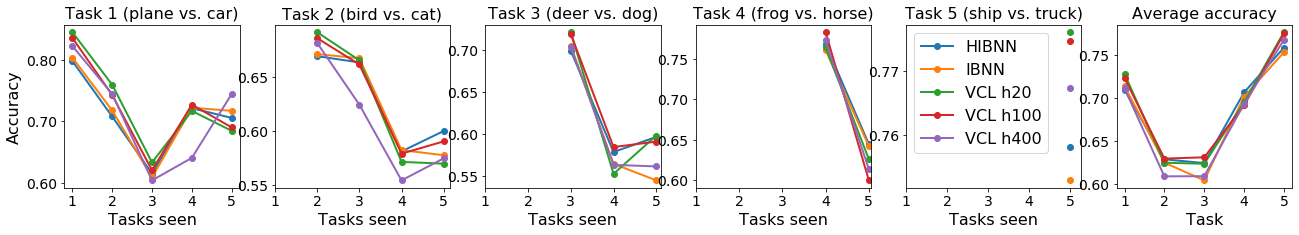

In [17]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (plane vs. car)",
          1: "Task 2 (bird vs. cat)",
          2: "Task 3 (deer vs. dog)",
          3: "Task 4 (frog vs. horse)",
          4: "Task 5 (ship vs. truck)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='HIBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h20[:, i]))+1, _vcl_result_h20[:, i], label='VCL h20', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_hibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='HIBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h20, label='VCL 20', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h100, label='VCL 100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h400, label='VCL 400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_hibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_hibp_cifar_mh_l1.pdf", bbox_inches='tight')
fig.show()

In [19]:
print("Overall accuracies HIBP: {0} pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h20: {0} pm {1}".format(np.nanmean(vcl_result_h20), np.nanmean(np.nanstd(vcl_result_h20, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies HIBP: 0.6736369926296174 pm 0.020340800657211115
Overall accuracies IBP: 0.6689914062836518 pm 0.013122172912131932
Overall accuracies VCL h20: 0.6781855727794269 pm 0.019827393632988723
Overall accuracies VCL h100: 0.6788241412863135 pm 0.023658582347364576
Overall accuracies VCL h400: 0.6647254296516378 pm 0.028695712634731255


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [20]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

In [21]:
Z_hibp = d['Z']
len(Z_hibp)

5

In [22]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_hibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_hibp[i][j])
    _Z_hibp.append(tmp)

In [23]:
len(_Z_hibp)

10

In [24]:
__Z_hibp = [np.concatenate(_Z_hibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_hibp[0].shape

(5, 2000, 200)

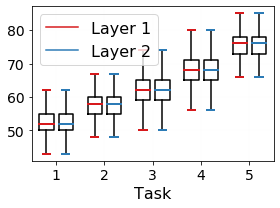

In [26]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
#plt.ylabel()
plt.xlim(-1, len(ticks)*2 -1)
plt.xlabel('Task', fontsize=legend_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_cifar_hibp_l2.pdf', bbox_inches='tight')
plt.show()

# IBP

In [27]:
Z_ibp = d_ibp['Z']
len(Z_ibp)

5

In [28]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [29]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2000, 200)

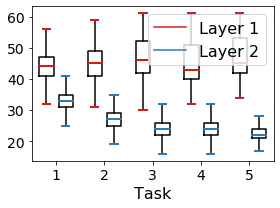

In [30]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2 -1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_cifar_ibp_l2.pdf', bbox_inches='tight')
plt.show()

## Plot for paper

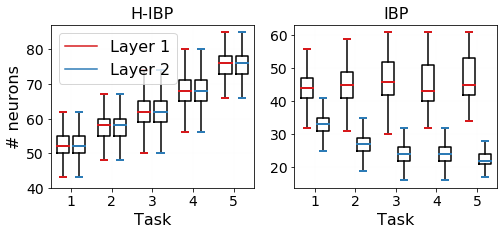

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
bpl = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
ax[0].plot([], c='#D7191C', label='Layer 1')
ax[0].plot([], c='#2C7BB6', label='Layer 2')
ax[0].legend(fontsize=legend_size)

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

for i in range(2):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax[0].set_yticks(range(40, 90, 10))
ax[1].set_yticks(range(20, 70, 10))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
ax[0].set_title('H-IBP', fontsize=legend_size)
ax[1].set_title('IBP', fontsize=legend_size)
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.savefig('plots/Zs_bp_cifar_hibp_ibp_l2.pdf', bbox_inches='tight')
plt.show()

# CL2

In [32]:
with open('results/split_mnist_cifar10_hibp_norm_sh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [33]:
with open('results/split_mnist_cifar10_ibp_norm_sh.pkl', 'rb') as input_file:
    d_ibp = pickle.load(input_file)
d_ibp.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [34]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc = d_ibp['vcl_ibp']
vcl_result_h20 = d['vcl_baselines'][20]
vcl_result_h100 = d['vcl_baselines'][100]
vcl_result_h400 = d['vcl_baselines'][400]
_hibp_acc = np.mean(hibp_acc, 0)
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h20 = np.mean(vcl_result_h20, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h400 = np.mean(vcl_result_h400, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h20 = np.nanmean(vcl_result_h20, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))
__vcl_result_h400 = np.nanmean(vcl_result_h400, (0,1))

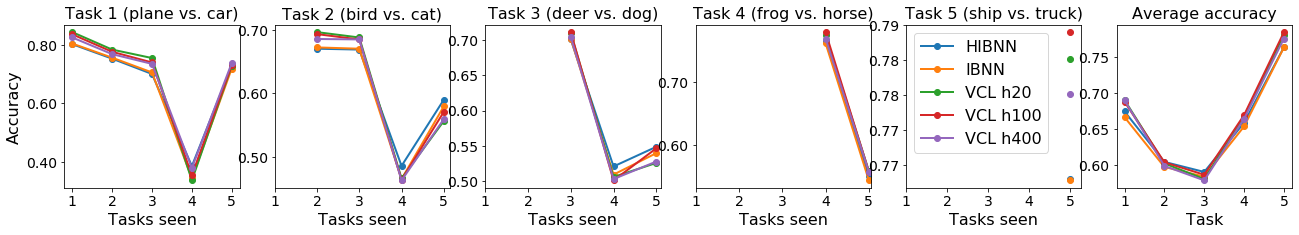

In [35]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
titles = {0: "Task 1 (plane vs. car)",
          1: "Task 2 (bird vs. cat)",
          2: "Task 3 (deer vs. dog)",
          3: "Task 4 (frog vs. horse)",
          4: "Task 5 (ship vs. truck)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='HIBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h20[:, i]))+1, _vcl_result_h20[:, i], label='VCL h20', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h400[:, i]))+1, _vcl_result_h400[:, i], label='VCL h400', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_hibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='HIBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h20, label='VCL 20', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h100, label='VCL 100', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__hibp_acc))+1, __vcl_result_h400, label='VCL 400', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_hibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_hibp_cifar_mh_l1.pdf", bbox_inches='tight')
fig.show()

In [36]:
print("Overall accuracies H-IBP: {0} pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h20: {0} pm {1}".format(np.nanmean(vcl_result_h20), np.nanmean(np.nanstd(vcl_result_h20, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))

Overall accuracies H-IBP: 0.6423921737695734 pm 0.01116320365872284
Overall accuracies IBP: 0.635864114916573 pm 0.009185171715156867
Overall accuracies VCL h20: 0.6473941278705995 pm 0.010392241608900897
Overall accuracies VCL h100: 0.6487665756916007 pm 0.010532420072243627
Overall accuracies VCL h400: 0.6452052342022458 pm 0.011918315092324222


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [38]:
Z_hibp = d['Z']
len(Z_hibp)

5

In [39]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_hibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_hibp[i][j])
    _Z_hibp.append(tmp)

In [40]:
__Z_hibp = [np.concatenate(_Z_hibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_hibp[0].shape

(5, 2000, 200)

In [42]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_hibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_hibp[i][j])
    _Z_hibp.append(tmp)

In [43]:
__Z_hibp = [np.concatenate(_Z_hibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_hibp[0].shape

(5, 2000, 200)

In [44]:
Z_ibp = d_ibp['Z']
len(Z_ibp)

5

In [45]:
num_layers=2
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [46]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2000, 200)

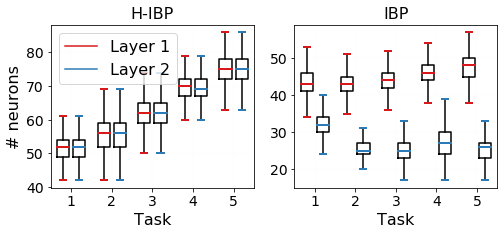

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
bpl = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
ax[0].plot([], c='#D7191C', label='Layer 1')
ax[0].plot([], c='#2C7BB6', label='Layer 2')
ax[0].legend(fontsize=legend_size)

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

for i in range(2):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
#ax[0].set_yticks(range(40, 90, 10))
#ax[1].set_yticks(range(20, 70, 10))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
ax[0].set_title('H-IBP', fontsize=legend_size)
ax[1].set_title('IBP', fontsize=legend_size)
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.savefig('plots/Zs_bp_cifar_hibp_ibp_l2_sh.pdf', bbox_inches='tight')
plt.show()